In [300]:
import numpy as np
import pandas as pd

In [301]:
df=pd.read_csv('spam1.csv', encoding = "ISO-8859-1")

In [302]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
117,ham,Goodo! Yes we must speak friday - egg-potato r...,NaN,NaN,NaN
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...,NaN,NaN,NaN
4608,ham,Y de asking like this.,NaN,NaN,NaN
1486,ham,Hello lover! How goes that new job? Are you th...,NaN,NaN,NaN
1853,ham,I just made some payments so dont have that mu...,NaN,NaN,NaN


In [303]:
df.shape


(5572, 5)

In [304]:
#1)Data Cleaning
#2)EDA(explo data analysis)
#3)Text Preprosseing
#4)model building
#5)Evaluation
#6)improvement
#7)website
#8)Deploy

1)DATA CLEANING

In [305]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [306]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [307]:
df.sample(5)

,v1,v2
4265,ham,The greatest test of courage on earth is to be...
860,ham,In work now. Going have in few min.
5250,spam,Urgent! Please call 09061213237 from a landlin...
3205,ham,At home also.
1725,ham,You know there is. I shall speak to you in &l...


In [308]:
#renaming
df.rename(columns={'v1':'Type','v2':'Text'},inplace=True)
df.sample(5)

,Type,Text
5192,ham,Oh oh... Den muz change plan liao... Go back h...
4503,ham,She told to hr that he want posting in chennai...
3536,ham,Mmmmm ... It was sooooo good to wake to your w...
3398,ham,"Yeah we wouldn't leave for an hour at least, h..."
2481,ham,K.:)do it at evening da:)urgent:)


In [309]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [310]:
df['Type']= encoder.fit_transform(df['Type'])

In [311]:
df.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [312]:
#missing values
df.isnull().sum()

Type    0
Text    0
dtype: int64

In [313]:
df.duplicated().sum()

403

In [314]:
df=df.drop_duplicates(keep='first')

In [315]:
df.duplicated().sum()

0

In [316]:
df.shape

(5169, 2)

EDA


In [317]:
df['Type'].value_counts()

0    4516
1     653
Name: Type, dtype: int64

In [318]:
import matplotlib.pyplot as plt

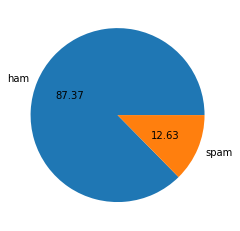

In [319]:
plt.pie(df['Type'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [320]:
!pip install nltk

In [321]:
import nltk

In [322]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [323]:
#number of characters
df['num_characters']=df['Text'].apply(len)

In [324]:
df.head()

,Type,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [325]:
#fetch number of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [326]:
df.head()

,Type,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [327]:
#counting sentences
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [328]:
df.head()


,Type,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [329]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [330]:
#describe only for ham
df[df['Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [331]:
#descibe only for spam
df[df['Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


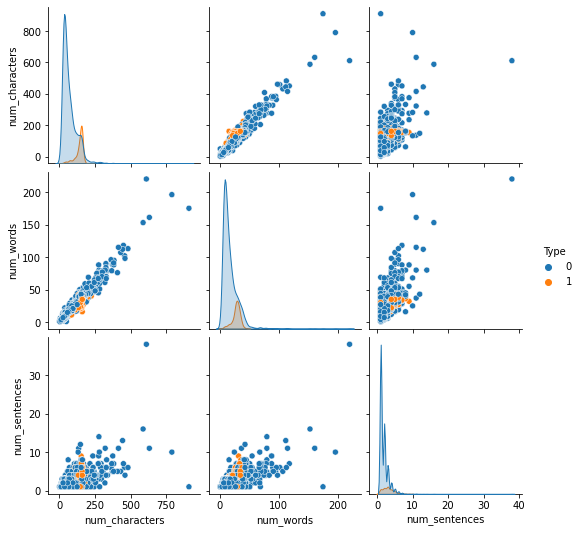

In [332]:
import seaborn as sns
sns.pairplot(df,hue='Type')

DATA PREPROCESSING
>lower case,
>Tokenization,
>Removing special characters,
>Removing stop words and punctuations,
>Stemming(walk,walking)

In [333]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
#stopwords.words('english')
import string

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [334]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [335]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [336]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [337]:
df['transformed_text']=df['Text'].apply(transform_text)

In [338]:
df.head()

,Type,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [339]:
spam_corpus=[]
for msg in df[df['Type']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [340]:
len(spam_corpus)

9939

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


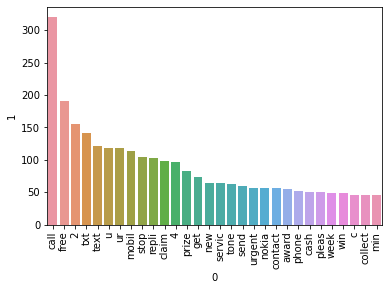

In [341]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [342]:
!pip install sklearn

In [343]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [344]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [345]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [346]:
X.shape

(5169, 3000)

In [347]:
y=df['Type'].values

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [350]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [351]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [352]:
import sklearn
X = sklearn.preprocessing.StandardScaler().fit_transform(X)
#sc_X = StandardScaler()
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [353]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))